# **Part 2: Regression Tree [20 marks]**

In this part, you will use scikit-learn's decision tree regressor and test its performance on the same dataset used in the previous part. You will be using different lookback sizes to form your data this time.

### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

### Regression Tree Implementation

* Write code to implement regression tree models for each lookback size ranging from 1-3. (Code modularity hint: use a blueprint for the model, and use its instances for each dataset formed from a lookback size)
* Evaluate the performance of each tree model by forming testing datasets associated with each respective lookback.

In [3]:
train_data = np.loadtxt('training_data.txt', delimiter=',')
test_data = np.loadtxt('test01.txt', delimiter=',')

def create_dataset(data, lookback=1):
    X, Y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:(i + lookback), :])
        Y.append(data[i + lookback, :])
    return np.array(X), np.array(Y)

def RegressionTree(train_dataset, test_dataset, lookback):
    X_train, Y_train = create_dataset(train_dataset, lookback)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2]) 
    
    X_test, Y_test = create_dataset(test_dataset, lookback)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2]) 
    
    model = DecisionTreeRegressor()
    model.fit(X_train, Y_train)
    
    Y_hat = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test, Y_hat))
    return rmse


### Evaluation and Analysis

*  Plot a line graph to evaluate your model's performance (using code for RMSE from Part 1A) across the lookback size range `i.e., 1-3`. (if any). Identify and explain any trend in how the RMSE values change with varying lookback size.

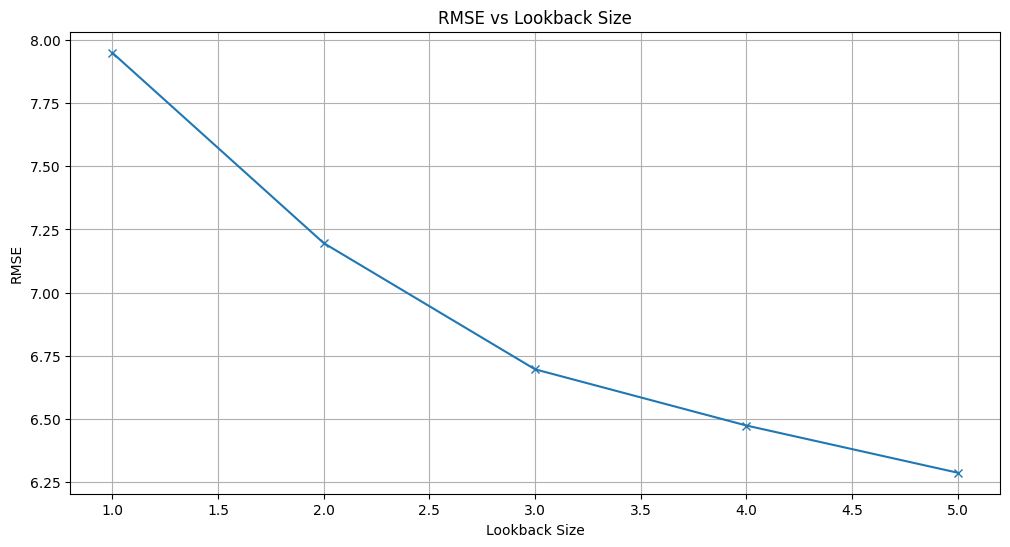

In [4]:
lookbacks = [1, 2, 3, 4, 5]
rmse_values = []

for i in lookbacks:
    rmse = RegressionTree(train_data, test_data, i)
    rmse_values.append(rmse)

plt.figure(figsize=(12, 6))
plt.plot(lookbacks, rmse_values, marker='x')
plt.title('RMSE vs Lookback Size')
plt.xlabel('Lookback Size')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

### $\color{green}{\text{Explanation/Reasoning}}$
As the lookback size increases from 1 to 5, the value of the RMSE decreases overall, although at an increasingly slower rate.
Increasing the lookback size initially provides the model with more past data, which significantly helps the model make better predictions about the robot's trajectory.<br> <br>
The gradual flattening of the curve suggests that beyond a certain point, adding more past data does not result in significantly better predictions. This could possibly be due to the fact that the robot's future position is majorly influenced by its more recent past, rather than by positions it occupied many steps ago.

### Visualization of Actual and Predicted Path

* Modify and use same code from the previous part. The time interval should be 6 seconds (choose from wherever in the testing data).
* Generate a graph illustrating the actual and predicted paths using one of the above lookback sizes. Which one should you choose?

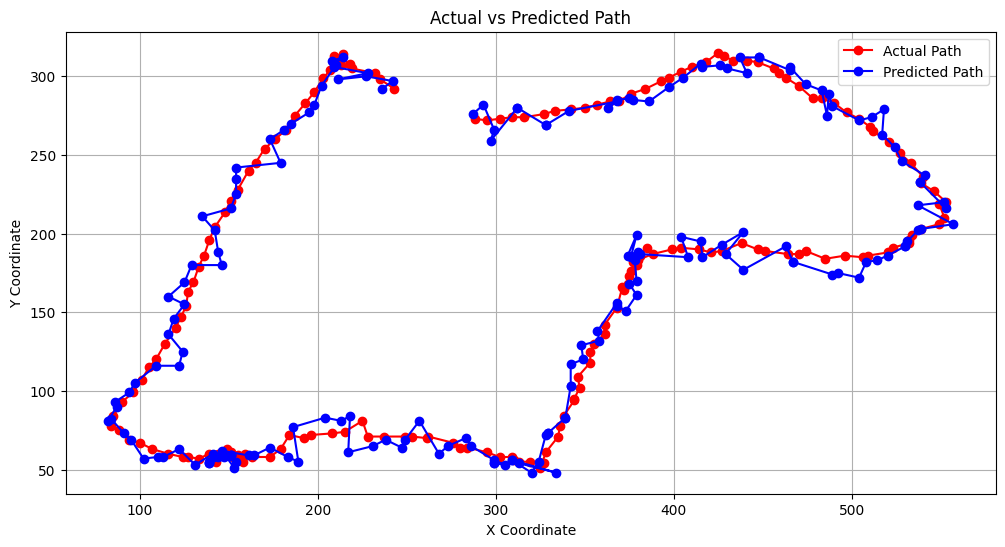

In [5]:
optimal_lookback = 5

X_test, Y_test = create_dataset(test_data, optimal_lookback)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
X_train, Y_train = create_dataset(train_data, optimal_lookback)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])

model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

Y_hat = model.predict(X_test)

start_second = 5
end_second = start_second + 6
start_i = ((start_second * 30) - 1)
end_i = ((end_second * 30) - 1)

actual_path = Y_test[start_i:end_i]
predicted_path = Y_hat[start_i:end_i]

plt.figure(figsize=(12, 6))
plt.plot(actual_path[:, 0], actual_path[:, 1], 'ro-', label='Actual Path')
plt.plot(predicted_path[:, 0], predicted_path[:, 1], 'bo-', label='Predicted Path')
plt.title('Actual vs Predicted Path')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()